In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/meteorite-cleaned.csv')
df.sample(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
10706,Frontier Mountain 01031,10214,Valid,H3-6,9.0,Found,2001.0,-72.99000,160.40389,"(-72.990000, 160.403890)"
9845,Elephant Moraine 90901,9310,Valid,L6,70.5,Found,1990.0,-76.27526,156.53310,"(-76.275260, 156.533100)"
21761,Queen Alexandra Range 93494,19582,Valid,H5,15.1,Found,1993.0,-84.00000,168.00000,"(-84.000000, 168.000000)"
22609,Queen Alexandra Range 97023,20430,Valid,LL6,394.7,Found,1997.0,-84.00000,168.00000,"(-84.000000, 168.000000)"
20462,Pecora Escarpment 02064,18246,Valid,H5,5.5,Found,2002.0,-85.63333,-68.70000,"(-85.633330, -68.700000)"


Meteors over the years

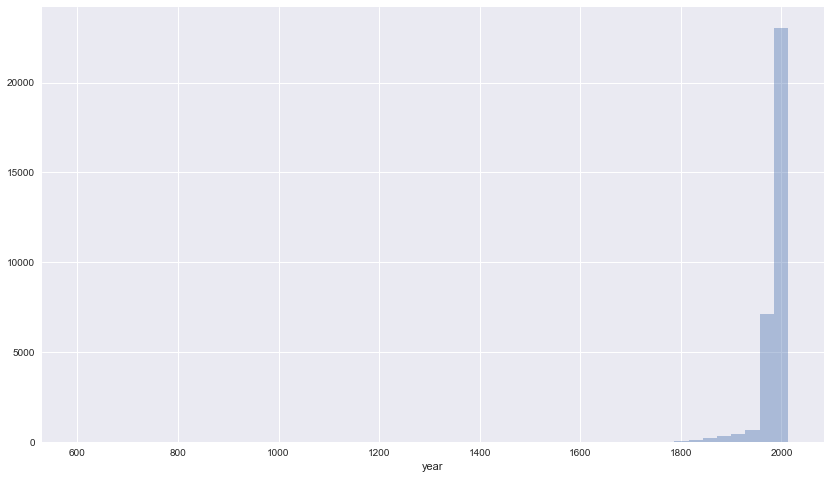

In [3]:
plt.figure(figsize=(14,8))
sns.distplot(df['year'], kde=False)

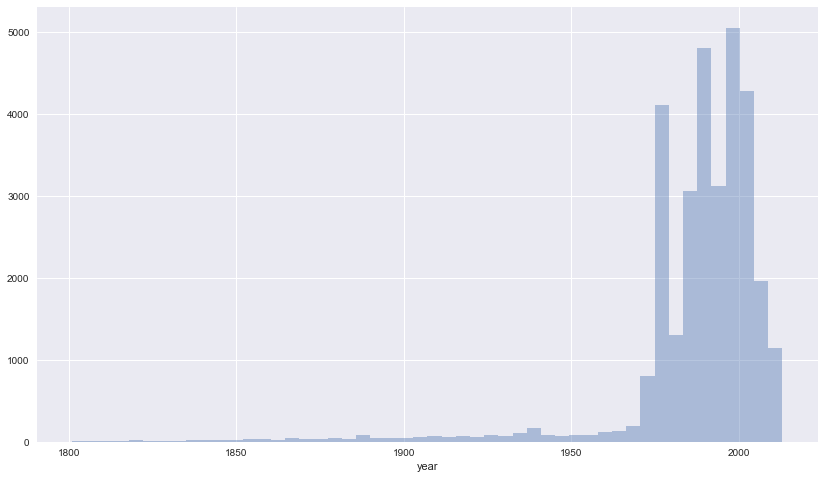

In [4]:
plt.figure(figsize=(14,8))
sns.distplot(df[df['year']>1800]['year'], kde=False)

In [5]:
import plotly


In [6]:
from plotly.graph_objs import Scatter, Layout

In [7]:
plotly.offline.init_notebook_mode(connected=True)

In [9]:
import plotly.graph_objs as go

In [47]:
df2 = df[:100]

In [13]:
trace3 = dict(
    type = 'scattergeo',
    lon = df2['reclong'],
    lat = df2['reclat'],
    marker = dict(
        #color = ['red', 'blue'],
        size = np.log10(df2['mass'])
    ),
    mode = 'markers'
    
)

plotly.offline.iplot([trace3])

In [48]:
trace4 = dict(
    type = 'scattergeo',
    locationmode = 'country names',
    lon = df2['reclong'],
    lat = df2['reclat'],
    text = df2['name'],
    marker = dict(
        #color = ['red', 'blue'],
        size = np.log10(df2['mass'])
    ),
    mode = 'markers'
    
)

layout4 = dict(
    title = "Meteorite Landings",
    geo = dict(
        scope = 'world',
        projection = dict(type = 'equidistant'),
        showland = True,
        landcolor = "rgb(250, 250, 250)",
        showcountries = True,
        countrywidth = 0.2,
        coastlinewidth = 0.5,
        showframe = False
    )
)

pfig4 = dict(data = [trace4], layout = layout4)

plotly.offline.iplot(pfig4)

In [56]:
df[df['mass'] >= 100000]['mass'].shape[0]

282

In [57]:
# plot meteorites with mass >= 100 kg (100000 grams)
df100kg = df[df['mass'] >= 100000]

In [68]:
df100kg['mass'].max()

60000000.0

In [99]:

trace5 = dict(
    type = 'scattergeo',
    locationmode = 'country names',
    lon = df100kg['reclong'],
    lat = df100kg['reclat'],
    text = df100kg['name'],
    marker = dict(
        color = df100kg['mass']/1000,
        size = np.log10(df100kg['mass']),
        #size = df100kg['mass']/1000000,
        line = dict(width=1, color='rgb(40,40,40)'),
        colorscale = 'Reds',
        colorbar = dict(title = "Meteorite mass in kg")
    ),
    mode = 'markers'
    
)

layout5 = dict(
    title = "Meteorite Landings: mass >= 100kg",
    geo = dict(
        scope = 'world',
        projection = dict(type = 'equidistant'),
        showland = True,
        landcolor = "rgb(250, 250, 250)",
        showcountries = True,
        countrywidth = 0.2,
        coastlinewidth = 0.5,
        showframe = False
    )
)

pfig5 = dict(data = [trace5], layout = layout5)

plotly.offline.iplot(pfig5)

In [102]:
df[df['mass'] >= 1000000]['mass'].shape[0]

53

In [100]:
# plot meteorites with mass >= 1000 kg (100000 grams)
df1000kg = df[df['mass'] >= 1000000]

In [105]:
trace6 = dict(
    type = 'scattergeo',
    locationmode = 'country names',
    lon = df1000kg['reclong'],
    lat = df1000kg['reclat'],
    text = df1000kg['name'],
    marker = dict(
        color = df1000kg['mass']/1000,
        size = np.log(df1000kg['mass']),
        #size = df100kg['mass']/100000,
        line = dict(width=1, color='rgb(40,40,40)'),
        colorscale = 'Reds',
        colorbar = dict(title = "Meteorite mass in kg")
    ),
    mode = 'markers'
    
)

layout6 = dict(
    title = "Meteorite Landings: mass >= 100kg",
    geo = dict(
        scope = 'world',
        projection = dict(type = 'equidistant'),
        showland = True,
        landcolor = "rgb(250, 250, 250)",
        showcountries = True,
        countrywidth = 0.2,
        coastlinewidth = 0.5,
        showframe = False
    )
)

pfig6 = dict(data = [trace6], layout = layout6)

plotly.offline.iplot(pfig6)